# Categorical Data Handling

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Text Feature Engineering

In [27]:
# Input data
sample = ['problem of evil', 'evil queen', 'horizon problem']
sample

['problem of evil', 'evil queen', 'horizon problem']

In [28]:
vec = CountVectorizer()

In [29]:
X = vec.fit_transform(sample)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
df

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
df2 = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
df2

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


# Image Feature Engineering

In [31]:
import cv2
import matplotlib.pyplot as plt

# read the image
img = cv2.imread("data/test.jpg")

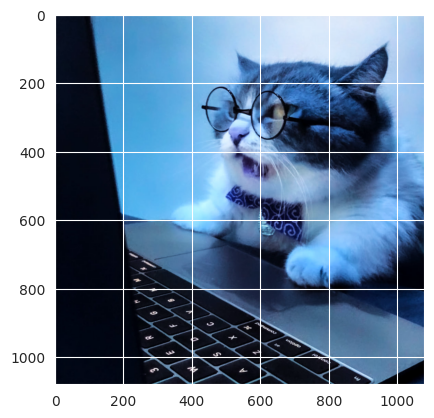

In [32]:
plt.imshow(img)

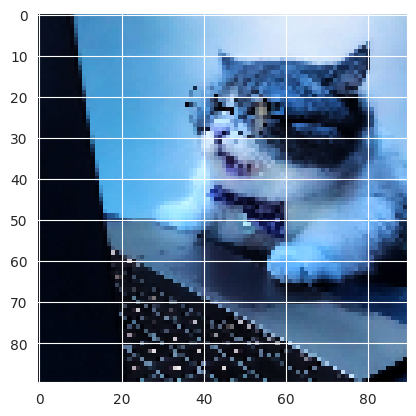

In [33]:
# resize image
output = cv2.resize(img, (90, 90))
plt.imshow(output)

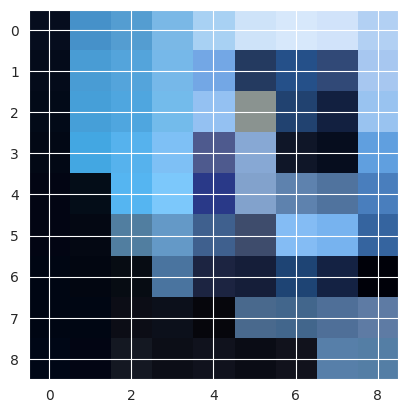

In [34]:
output = cv2.resize(img, (9, 9))
plt.imshow(output)

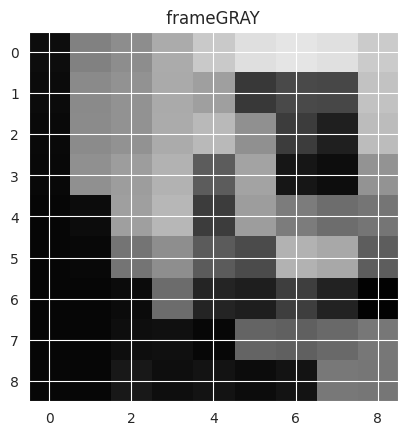

frameGRAY:  (9, 9)
[[ 13 129 141 171 201 223 229 224 203]
 [ 11 138 146 170 159  56  74  71 194]
 [  9 139 146 171 185 144  61  31 188]
 [  8 144 157 178  92 163  22  13 147]
 [  6  12 159 183  61 157 124 109 117]
 [  6   8 116 142  91  75 178 168  93]
 [  6   6  11 108  37  30  62  34   2]
 [  6   6  14  16   7 100  96 106 119]
 [  7   6  24  14  19  12  19 120 118]]


In [35]:
frameGRAY = cv2.cvtColor(output, cv2.COLOR_RGB2GRAY)
plt.imshow(frameGRAY, cmap="gray", vmin=0, vmax=255)
plt.title(" frameGRAY ")
plt.show()
print("frameGRAY: ", frameGRAY.shape)
print(frameGRAY)

# # Handle imbalanced datasets

In [36]:
import pandas as pd

# Load the dataset
df = pd.read_csv("data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
len(df)

768

In [38]:
# Display the target class distribution
target_count = df.Outcome.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1', '\n')

Class 0: 500
Class 1: 268
Proportion: 1.87 : 1 



In [39]:
groups = df.groupby('Outcome')
groups

In [40]:
df['Outcome'].unique()

array([1, 0])

In [41]:
groups.get_group(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [42]:
# Display the data description of each target class
df.groupby('Outcome').describe().T

Outcome                     0           1
Pregnancies count  500.000000  268.000000
            mean     3.298000    4.865672
            std      3.017185    3.741239
            min      0.000000    0.000000
            25%      1.000000    1.750000
...                       ...         ...
Age         min     21.000000   21.000000
            25%     23.000000   28.000000
            50%     27.000000   36.000000
            75%     37.000000   44.000000
            max     81.000000   70.000000

[64 rows x 2 columns]

## Method 1: Under-sampling

In [43]:
# Method 1: Random Under-Sampling
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.Outcome == 0]
df_minority = df[df.Outcome == 1]
print('Majority: ', len(df_majority))
print('Minority: ', len(df_minority))

Majority:  500
Minority:  268


In [44]:
# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,    # sample without replacement
                                   n_samples=len(df_minority),    # to match minority class
                                   random_state=123) # reproducible results

print('Majority down-sampled: ',len(df_majority_downsampled))

Majority down-sampled:  268


In [45]:
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [46]:
# Display new class counts
print('New total samples: ', len(df_downsampled))
print(df_downsampled.Outcome.value_counts(), '\n')

New total samples:  536
Outcome
0    268
1    268
Name: count, dtype: int64 



## Method 2: Random Over-Sampling

In [47]:
# Method 2: Random Over-Sampling

# Separate majority and minority classes
df_majority = df[df.Outcome == 0]
df_minority = df[df.Outcome == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results
print('Majority: ', len(df_majority))
print('Minority: ', len(df_minority))

Majority:  500
Minority:  268


In [48]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled.Outcome.value_counts()

Outcome
0    500
1    500
Name: count, dtype: int64

In [49]:
# Method 3: SMOTE (Synthetic Minority Over-sampling Technique)
# SMOTE analyzes existing minority class samples and their nearest neighbors in the feature space.
# It then generates new samples by interpolating between these points.
from imblearn.over_sampling import SMOTE

In [50]:
# Separate input features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [51]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [52]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [53]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [54]:
# Apply SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

In [55]:
# Display new class counts
y_sm.value_counts()

Outcome
1    500
0    500
Name: count, dtype: int64